# Deep CNN Image Classification

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [25]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [26]:
X_test.shape

(10000, 32, 32, 3)

In [27]:
# Define a list called "classes" which holds the labels of the image in the dataset, in accordance with their index value
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [28]:
# Need to reshape y_train to correspond with X_train, turn it into a 1D array from a 2D array using numpy.reshape()
y_train[:5]
X_train[:5]

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [29]:
# The function takes in an index, and returns an image represented by the values at that index
def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])

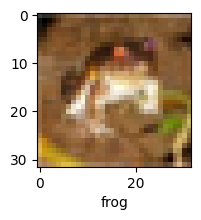

In [13]:
plot_sample(X_train, y_train, 0)

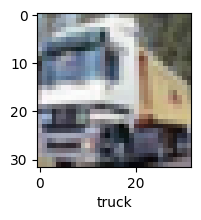

In [15]:
plot_sample(X_train, y_train, 1)

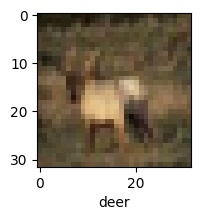

In [16]:
plot_sample(X_train, y_train, 3)

In [30]:
# Normalize RGB values by dividing by 255
X_train = X_train/255
X_test = X_test/255

In [33]:
# Initialize an Artifical Neural Network model and add the network layers
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

# Compile the model
ann.compile(optimizer='SGD',
            loss = "sparse_categorical_crossentropy",
            metrics = ['accuracy'])

In [34]:
# Train the model
ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.8121 - accuracy: 0.3548
Epoch 2/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.6243 - accuracy: 0.4285
Epoch 3/5
1563/1563 [==============================] - 151s 97ms/step - loss: 1.5400 - accuracy: 0.4592
Epoch 4/5
1563/1563 [==============================] - 143s 92ms/step - loss: 1.4832 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4320 - accuracy: 0.4958


In [36]:
# Print a classification report on the predicted test data
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 11s 35ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.29      0.41      1000
           1       0.74      0.27      0.40      1000
           2       0.47      0.19      0.27      1000
           3       0.37      0.36      0.37      1000
           4       0.32      0.63      0.43      1000
           5       0.53      0.22      0.31      1000
           6       0.54      0.50      0.52      1000
           7       0.51      0.58      0.54      1000
           8       0.35      0.85      0.50      1000
           9       0.52      0.52      0.52      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.43     10000
weighted avg       0.51      0.44      0.43     10000



In [71]:
# Note that the ANN resulting accuracy was not very high. We can do better with a Deep CNN.
# To be clear, the following is the difference between the ANN above and the CNN below:
# A CNN will detect image features, and have increased accuracy. It has additional CNN layers on top of the Dense layers already in an ANN,
# as well as a pooling layer.

# Initialize a Convolutional Neural Network model and add the network layers
cnn = models.Sequential([
    # CNN Layers
    layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')  # Softmax activation will normalize to a probability
])

In [72]:
# Now, compile the CNN model
cnn.compile( optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [73]:
# Now, train the CNN model
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4604 - accuracy: 0.4760
Epoch 2/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1114 - accuracy: 0.6096
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9726 - accuracy: 0.6624
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8846 - accuracy: 0.6918
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8180 - accuracy: 0.7149
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7558 - accuracy: 0.7362
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6995 - accuracy: 0.7567
Epoch 8/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6483 - accuracy: 0.7738
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6033 - accuracy: 0.7887
Epoch 10/10
1563/1563 [==============================] - 65s 42m

In [74]:
# As seen above, a CNN model within 5 epochs reached 70% accuracy, while an ANN model with the same data reached 50% accuracy
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9831 - accuracy: 0.6898


[0.9830938577651978, 0.6898000240325928]

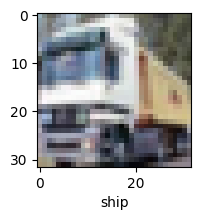

In [75]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test,1)

In [76]:
# Model prediction result is given as probability values (recall the softmax dense layer used). Use argmax to correct this
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[9.82810510e-04, 2.56631465e-04, 2.81446264e-04, 9.73780930e-01,
        6.37542762e-05, 1.89661216e-02, 8.74452526e-04, 7.84343923e-04,
        4.00894182e-03, 4.33041606e-07],
       [1.04537010e-02, 3.18563372e-01, 1.59850178e-08, 8.24754764e-10,
        1.60416888e-10, 1.03078015e-11, 1.38933087e-10, 6.70950014e-12,
        6.70800209e-01, 1.82606716e-04],
       [1.99115172e-01, 2.97601938e-01, 1.15123046e-04, 5.05432545e-04,
        3.32038144e-05, 1.87733112e-05, 3.49918773e-05, 1.74135148e-05,
        4.80635762e-01, 2.19222549e-02],
       [9.61049080e-01, 5.15649468e-03, 7.51101784e-03, 6.72159891e-04,
        5.66379284e-04, 5.42225007e-06, 6.18629144e-07, 2.95873633e-05,
        2.27664653e-02, 2.24255631e-03],
       [3.15362342e-07, 4.73271666e-06, 6.33040024e-03, 1.09158093e-02,
        4.55852717e-01, 3.00970394e-03, 5.23879766e-01, 3.95227016e-06,
        2.56064118e-06, 1.72159904e-08]], dtype=float32)

In [77]:
# np.argmax takes in an array, returns the index of the max value
# So for the below line, it would return 1, as the highest value is at index 1 (12)
np.argmax([5,12,1,2])

1

In [78]:
# Use argmax as an argument in y_classes, to get the predicted value which is associated "class" or type of picture
# Note that each of the 10 image categories are numbered according to the index in the classes list
# Also recall that cnn.predict returns an array of values which are represented as probabilities (due to the softmax layer)
# Since these probabilities are ordered values, np.argmax is used to find the index of the highest number (therefore highest probability of the image being the predicted result)
# With argmax, we can use it to get the index of the classes list, and thus, return the predicted label of the image
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [79]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

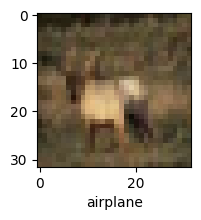

In [81]:
plot_sample(X_test, y_test, 3)

In [82]:
classes[y_classes[3]]

'airplane'

Please note: Despite the error in mismatched data, it seems that the predicted results from the model are in line with the test data